# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** M. Dzaka Al Fikri
- **Email:** dzakaal10@gmail.com
- **ID Dicoding:** dzakaal10

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan waktu (jam) dalam satu hari?
- Apakah terdapat tren musiman dalam penggunaan sepeda harian?
- Apakah hari libur memengaruhi pola penggunaan sepeda?
- Bagaimana distribusi penggunaan sepeda di antara berbagai hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data/hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

- Menghapus Kolom instant Karena hanya berfungsi sebagai indeks unik dan tidak relevan dan hubungannya untuk analisis lebih lanjut.
- Mengubah tipe data menjadi datetime untuk kolom yang berisi tanggal atau waktu
- Mengganti nama kolom agar lebih mudah dipahami
- Mengganti penamaan isi kolom agar lebih mudah dipahami

#### Dropping instant

In [12]:
day_df.drop(columns="instant",axis=1, inplace=True)
hour_df.drop(columns="instant", axis=1, inplace=True)

#### Rename columns
Mengganti nama kolom dteday, yr, mnth, hum, hr, cnt agar lebih mudah dipahami

In [13]:
day_df.rename(columns={"dteday" : "date", "yr" : "year", "mnth" : "month", "hum" : "humidity", "cnt" : "total_riders"}, inplace=True)
hour_df.rename(columns={"dteday" : "date", "yr" : "year", "mnth" : "month", "hr" : "hour", "hum" : "humidity", "cnt" : "total_riders"}, inplace=True)

#### Change type data
Mengganti type data kolom yang memiliki format tanggal

In [14]:
hour_df["date"] = pd.to_datetime(hour_df["date"])
day_df["date"] = pd.to_datetime(day_df["date"])

#### Rename column contents
Mengganti isi kolom agar lebih mudah dipahami dikolom year, season, weekday

In [15]:
day_df.year.replace({0 : "2011", 1 : "2012"}, inplace=True)
hour_df.year.replace({0 : "2011", 1 : "2012"}, inplace=True)

day_df.season.replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}, inplace=True)
hour_df.season.replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}, inplace=True)

day_df.weekday.replace({0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}, inplace=True)
hour_df.weekday.replace({0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}, inplace=True)

## Exploratory Data Analysis (EDA)

### Explore day_df

In [16]:
day_df.describe(include="all")

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_riders
count,731,731,731,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,NaN,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,6.519836,0.028728,NaN,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,1.000000,0.000000,NaN,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,4.000000,0.000000,NaN,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,7.000000,0.000000,NaN,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,10.000000,0.000000,NaN,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,12.000000,1.000000,NaN,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan rangkuman parameter statistik di atas, kita memperoleh informasi penggunaan sepeda selama 731 hari dengan jumlah rata-rata pengguna sebanyak 4504 orang per hari. Jumlah pengguna sepeda berkisar antara 22 hingga 8714 orang, dengan standar deviasi sebesar 1937, menunjukkan variasi penggunaan yang cukup besar. Pengguna kasual rata-rata berjumlah 848 per hari, sementara pengguna terdaftar rata-rata 3656 per hari. Informasi ini menunjukkan bahwa penggunaan sepeda didominasi oleh pengguna terdaftar, sementara kondisi cuaca, dengan suhu rata-rata 0.50 dan kelembapan 0.63, turut mempengaruhi jumlah pengguna sepeda setiap harinya.

In [17]:
day_df.groupby(["season", "weekday"])["total_riders"].mean().unstack()

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
season,,,,,,,
Fall,5750.629630,5627.192308,5584.962963,5324.269231,5698.607143,5656.111111,5853.851852
Spring,2856.307692,2452.730769,2432.333333,2229.444444,2894.200000,2792.520000,2611.080000
Summer,5222.769231,4565.000000,5334.192308,4986.538462,5200.269231,4824.961538,4835.074074
Winter,4898.680000,4698.846154,4906.040000,4451.961538,4730.880000,4658.923077,4766.800000


Berdasarkan hasil diatas, penggunaan sepeda merata di setiap musim dan hari dalam seminggu, dengan puncak tertinggi terjadi pada musim panas dan hari kerja, terutama Jumat dan Sabtu. Rata-rata pengguna sepeda menunjukkan variasi berdasarkan musim, mengindikasikan bahwa pelanggan lebih aktif bersepeda dalam cuaca yang lebih baik.

### Explore hour_df

In [18]:
hour_df.describe()

,date,month,hour,holiday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_riders
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,6.537775,11.546752,0.028770,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,4.000000,6.000000,0.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,7.000000,12.000000,0.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,10.000000,18.000000,0.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,12.000000,23.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,3.438776,6.914405,0.167165,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Berdasarkan rangkuman statistik di atas, dataset ini mencakup total 17.379 entri penggunaan sepeda per jam. Rata-rata total pengguna per jam adalah 189 orang, dengan pengguna minimum 1 dan maksimum 977 orang. Pengguna kasual rata-rata berjumlah 36 per jam, sedangkan pengguna terdaftar lebih banyak, yaitu rata-rata 154 per jam. Suhu rata-rata tercatat 0.50 dengan kelembapan rata-rata 0.63 dan kecepatan angin rata-rata 0.19. Standar deviasi menunjukkan adanya variasi yang cukup besar dalam penggunaan sepeda, terutama pada jam-jam tertentu, yang dipengaruhi oleh cuaca, suhu, dan waktu dalam sehari.

In [19]:
hour_df.groupby("hour")["total_riders"].mean().sort_values(ascending=True)

hour
4       6.352941
3      11.727403
5      19.889819
2      22.869930
1      33.375691
0      53.898072
6      76.044138
23     87.831044
22    131.335165
21    172.314560
10    173.668501
11    208.143054
7     212.064649
9     219.309491
20    226.030220
14    240.949246
15    251.233196
12    253.315934
13    253.661180
19    311.523352
16    311.983562
8     359.011004
18    425.510989
17    461.452055
Name: total_riders, dtype: float64

Berdasarkan hasil diatas, terlihat bahwa penggunaan sepeda meningkat secara signifikan pada pagi hari, dengan puncak penggunaan terjadi sekitar jam 8 hingga 9 pagi, dan kembali meningkat pada sore hari menjelang malam.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu (jam) dalam satu hari?

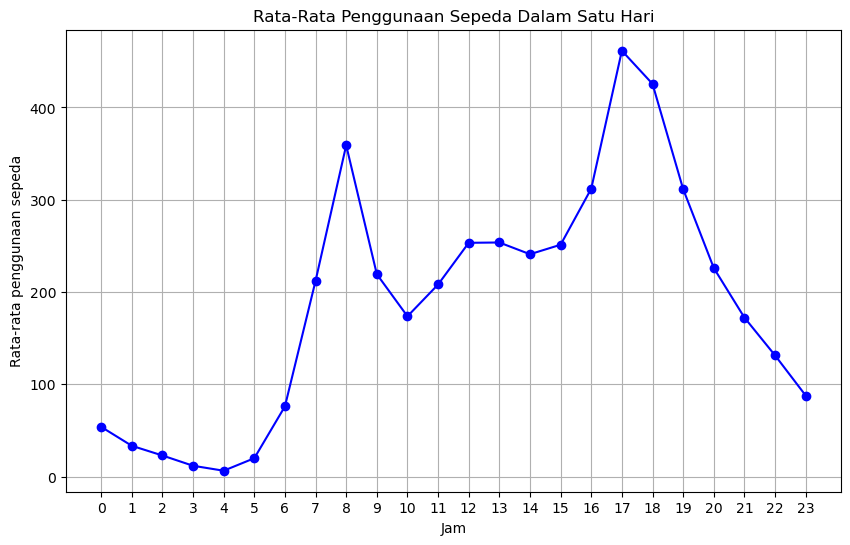

In [20]:
avgHourly = hour_df.groupby("hour")["total_riders"].mean()

plt.figure(figsize=(10, 6))
plt.plot(avgHourly.index, avgHourly.values, marker="o", linestyle="-", color="b")
plt.title("Rata-Rata Penggunaan Sepeda Dalam Satu Hari")
plt.xlabel("Jam")
plt.ylabel("Rata-rata penggunaan sepeda")
plt.grid(True)

# Show the plot
plt.xticks(avgHourly.index)  # Ensure all hours are visible on the x-axis
plt.show()

Berdasarkan grafik, penggunaan sepeda mencapai puncak pada pukul 7-9 pagi dan 16-19 sore, kemungkinan terkait dengan aktivitas berangkat dan pulang kerja. Setelah pukul 20, penggunaan sepeda menurun drastis hingga malam hari.

### Pertanyaan 2: Apakah terdapat tren musiman dalam penggunaan sepeda harian?

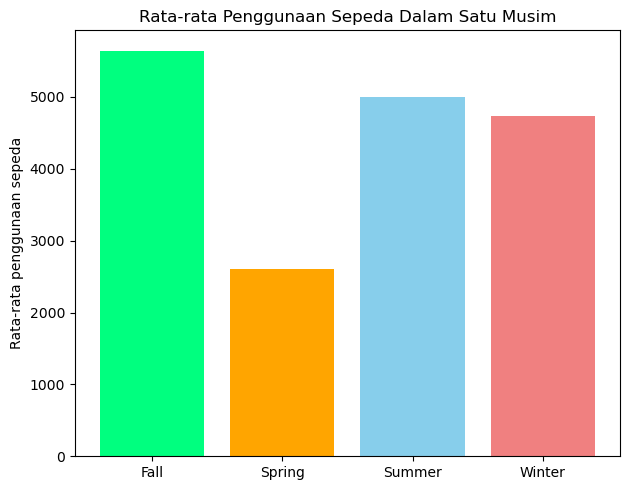

In [21]:
avgSeasonal = day_df.groupby("season")["total_riders"].mean()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(avgSeasonal.index, avgSeasonal.values, color=["springgreen", "orange", "skyblue", "lightcoral"])
plt.title("Rata-rata Penggunaan Sepeda Dalam Satu Musim")
plt.ylabel("Rata-rata penggunaan sepeda")

plt.tight_layout()
plt.show()

Berdasarkan grafik, penggunaan sepeda tertinggi terjadi pada musim gugur, diikuti oleh musim panas dan musim dingin, sementara musim semi menunjukkan penggunaan paling rendah. Ini menunjukkan bahwa musim gugur dan panas lebih mendukung aktivitas bersepeda.

### Pertanyaan 3: Apakah hari libur memengaruhi pola penggunaan sepeda?

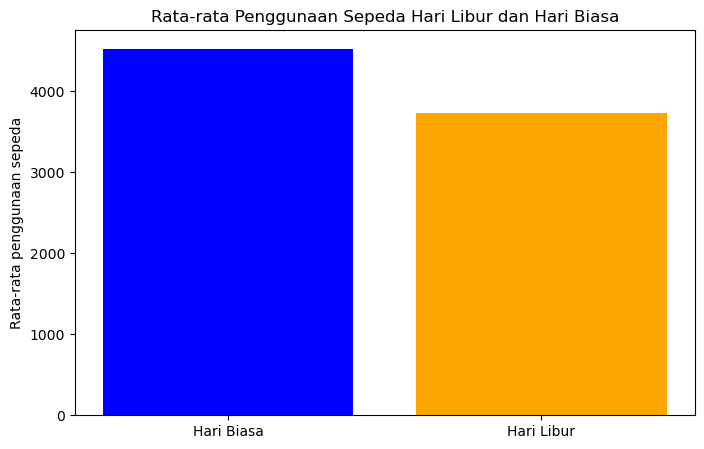

In [22]:
avgHoliday = day_df.groupby("holiday")["total_riders"].mean()

plt.figure(figsize=(8,5))
plt.bar(["Hari Biasa", "Hari Libur"], avgHoliday, color=["blue", "orange"])
plt.title("Rata-rata Penggunaan Sepeda Hari Libur dan Hari Biasa")
plt.ylabel("Rata-rata penggunaan sepeda")
plt.show()

Berdasarkan grafik, penggunaan sepeda lebih tinggi pada hari biasa dibandingkan dengan hari libur. Ini menunjukkan bahwa pada hari-hari kerja, penggunaan sepeda cenderung meningkat, kemungkinan karena digunakan untuk aktivitas sehari-hari seperti berangkat kerja atau sekolah, sedangkan pada hari libur, penggunaan sepeda sedikit berkurang.

### Pertanyaan 4: Bagaimana distribusi penggunaan sepeda di antara berbagai hari dalam seminggu?

c:\Users\62853\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


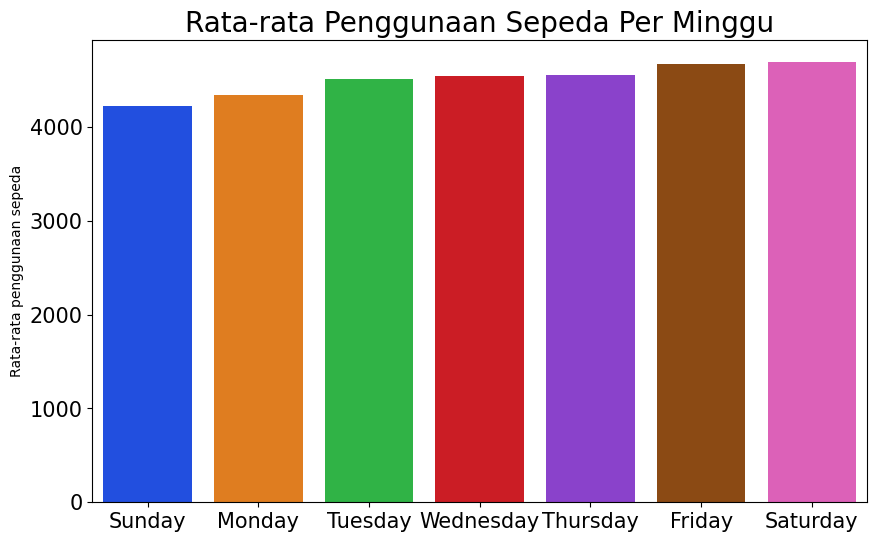

In [23]:
avgWeekly = day_df.groupby("weekday")["total_riders"].mean().sort_values(ascending=True)
weekly = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=weekly, y=avgWeekly, palette="bright")
ax.set_title("Rata-rata Penggunaan Sepeda Per Minggu", loc="center", fontsize=20)
ax.set_ylabel("Rata-rata penggunaan sepeda")
ax.set_xlabel(None)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.show()

Berdasarkan grafik, distribusi penggunaan sepeda cukup merata sepanjang minggu, dengan sedikit peningkatan pada hari Jumat dan Sabtu. Penggunaan sepeda terlihat lebih rendah pada hari Minggu, namun secara keseluruhan tetap konsisten pada hari-hari lainnya. Ini menunjukkan bahwa penggunaan sepeda tidak terlalu dipengaruhi oleh hari dalam seminggu, meskipun hari Jumat dan Sabtu cenderung sedikit lebih populer.

## Analisis Lanjutan (Opsional)

#### RFM Analisis
- Recency: Seberapa baru seorang pengguna menyewa sepeda.
- Frequency: Seberapa sering seorang pengguna menyewa sepeda.
- Monetary: Kita bisa mengganti dengan Total Bike Usage.

In [24]:
most_recent = day_df["date"].max()
day_df["Recency"] = (most_recent - day_df["date"]).dt.days
frequency = day_df.groupby("weekday")["total_riders"].sum()
total_usage = day_df.groupby("weekday")["total_riders"].sum()

In [25]:
rfm_df = pd.DataFrame({
    "Recency": day_df.groupby("weekday")["Recency"].mean(),
    "Frequency": frequency,
    "Total_Bike_Usage": total_usage
})
print(rfm_df)


           Recency  Frequency  Total_Bike_Usage
weekday                                        
Friday       363.5     487790            487790
Monday       364.0     455503            455503
Saturday     366.0     477807            477807
Sunday       365.0     444027            444027
Thursday     364.5     485395            485395
Tuesday      366.5     469109            469109
Wednesday    365.5     473048            473048


## Conclusion

- Conclution pertanyaan 1: pola penggunaan sepeda mencapai puncak pada pukul 7-9 pagi dan 16-19 sore, kemungkinan besar terkait dengan aktivitas berangkat dan pulang kerja. Penggunaan sepeda menurun drastis setelah pukul 20 hingga malam hari.
- Conclution pertanyaan 2: Ya, terdapat tren musiman dalam penggunaan sepeda. Penggunaan sepeda tertinggi terjadi pada musim gugur, diikuti oleh musim panas dan musim dingin. Musim semi memiliki rata-rata penggunaan sepeda terendah, menunjukkan bahwa cuaca yang lebih hangat mendukung penggunaan sepeda.
- Conclution pertanyaan 3: Hari libur memang memengaruhi pola penggunaan sepeda. Rata-rata penggunaan sepeda lebih tinggi pada hari-hari biasa dibandingkan dengan hari libur. Ini menunjukkan bahwa penggunaan sepeda lebih sering terjadi pada hari kerja, kemungkinan karena aktivitas rutin seperti berangkat kerja atau sekolah.
- Conclution pertanyaan 4: Distribusi penggunaan sepeda relatif merata sepanjang minggu, dengan sedikit peningkatan pada hari Jumat dan Sabtu. Hari Minggu memiliki sedikit penurunan penggunaan, namun secara keseluruhan hari-hari lainnya menunjukkan pola penggunaan yang stabil.

In [26]:
pip list

Package                           Version
--------------------------------- ------------
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
ai-pkg                            0.0.1
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.2
anaconda-project                  0.11.1
anyio              